In [1]:
import sys
import os
sys.path.append(os.path.abspath('../../../src'))

import torch
from utils.utils import get_latest_model_path
from utils.dataloader import get_dataset, get_saved_numpy

In [6]:
model_path = "../../../src/results/models/ann/ann_03032025_23-52-26.pt"
print(model_path)

../../../src/results/models/ann/ann_03032025_23-52-26.pt


In [7]:
model = torch.load(model_path)
params = model["model_state"]

In [12]:
params.keys()

odict_keys(['features.0.weight', 'features.0.bias', 'features.1.weight', 'features.1.bias', 'features.1.running_mean', 'features.1.running_var', 'features.1.num_batches_tracked', 'features.4.weight', 'features.4.bias', 'features.5.weight', 'features.5.bias', 'features.5.running_mean', 'features.5.running_var', 'features.5.num_batches_tracked', 'classifier.0.weight', 'classifier.0.bias', 'classifier.2.weight', 'classifier.2.bias', 'classifier.4.weight', 'classifier.4.bias'])

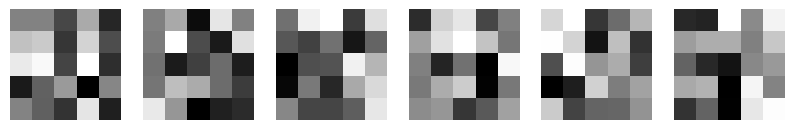

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Convert weights to NumPy array
weights = params['features.0.weight']
weights = weights.cpu().numpy()

# Normalize values for better visualization
weights_min, weights_max = weights.min(), weights.max()
weights = (weights - weights_min) / (weights_max - weights_min)

# Number of filters (out_channels)
num_filters = weights.shape[0]
num_channels = weights.shape[1]

# Plot the first few filters
fig, axes = plt.subplots(1,6, figsize=(10, 10))  # Adjust grid for filter count
axes = axes.ravel()

for i in range(min(64, num_filters)):  # Show up to 64 filters
        axes[i*num_channels + j].imshow(weights[i, 0], cmap="gray")  # Show only first channel
        axes[i*num_channels + j].axis("off")

plt.show()
